In [1]:
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# load the data using pandas
df = pd.read_excel('C:/Users/agnes/QualidadeARO3.xlsx',sheet_name='Sheet1')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Antas-Espinho      8784 non-null   float64
 1   Entrecampos        8784 non-null   float64
 2   Estarreja          8784 non-null   float64
 3   Ihavo              8784 non-null   float64
 4   Laranjeiro-Almada  8784 non-null   float64
 5   Mem-Martins        8784 non-null   float64
 6   Paio-Pires         8784 non-null   float64
 7   Restelo            8784 non-null   float64
 8   Sobreiras-Porto    8784 non-null   float64
 9   VNTelha-Maia       8784 non-null   float64
dtypes: float64(10)
memory usage: 686.4 KB


In [3]:
#dividing the series
series1 = df['Antas-Espinho']
series2 = df['Entrecampos']
series3 = df['Estarreja']
series4 = df['Laranjeiro-Almada']
series5 = df['Mem-Martins']
series6 = df['Paio-Pires']
series7 = df['Restelo']
series8 = df['Sobreiras-Porto']
series9 = df['VNTelha-Maia']

#time span
dates = pd.date_range("2020-01-01", periods=len(df), freq="H")

Text(0.5, 1.0, 'VNTelha-Maia')

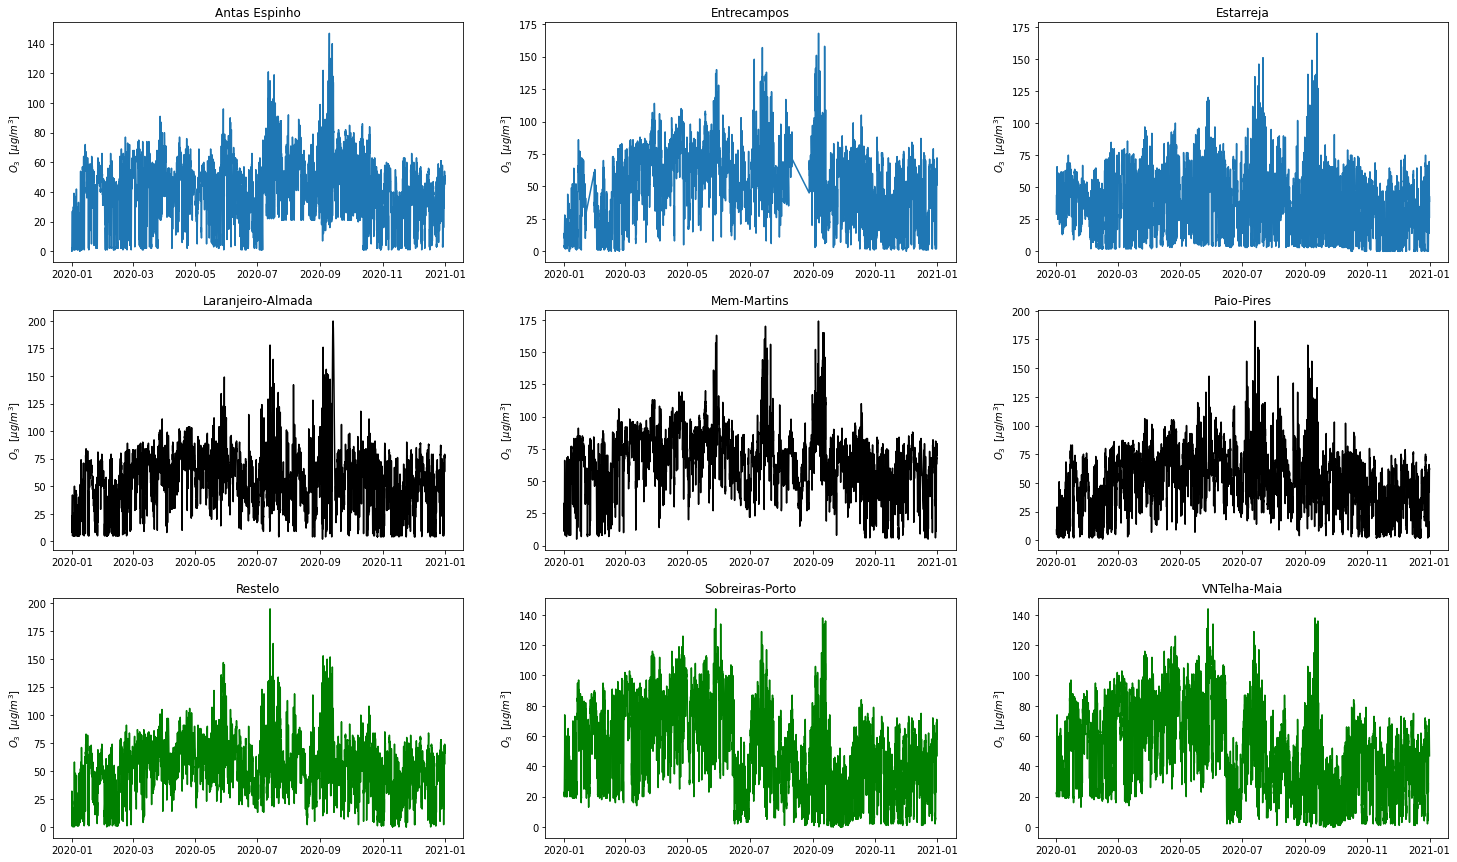

In [4]:
#Time plots of all nine series for an initial look
fig, axs = plt.subplots(3, 3,figsize=(25,15))

axs[0, 0].plot_date(dates,series1, fmt='-')
axs[0, 0].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[0, 0].set_title('Antas Espinho')
axs[0, 1].plot_date(dates,series2, fmt='-')
axs[0, 1].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[0, 1].set_title('Entrecampos')
axs[0, 2].plot_date(dates,series3, fmt='-')
axs[0, 2].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[0, 2].set_title('Estarreja')
axs[1, 0].plot_date(dates,series4, fmt='k-')
axs[1, 0].set_title('Laranjeiro-Almada')
axs[1, 0].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[1, 1].plot_date(dates,series5, fmt='k-')
axs[1, 1].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[1, 1].set_title('Mem-Martins')
axs[1, 2].plot_date(dates,series6, fmt='k-')
axs[1, 2].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[1, 2].set_title('Paio-Pires')
axs[2, 0].plot_date(dates,series7, fmt='g-')
axs[2, 0].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[2, 0].set_title('Restelo')
axs[2, 1].plot_date(dates,series8, fmt='g-')
axs[2, 1].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[2, 1].set_title('Sobreiras-Porto')
axs[2, 2].plot_date(dates,series9, fmt='g-')
axs[2, 2].set_ylabel('$O_3$  $[\mu g/m^3]$')
axs[2, 2].set_title('VNTelha-Maia')       

In [9]:
#Chose time series to analyse
series = series1
#series = series2
#series = series3
#series = series4
#series = series5
#series = series6
#series = series7
#series = series8
#series = series9

mean = 41.918861490096646


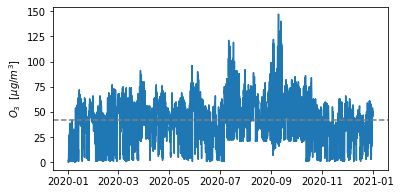

In [10]:
#Plotting the series with mean value
plt.figure(figsize=(6,3))
plt.ylabel('$O_3$  $[\mu g/m^3]$')
plt.plot_date(dates, series, fmt='-')
mean = series.mean()
plt.axhline(y=mean, color='tab:gray', linestyle='--')
print('mean =', mean)

<Figure size 1152x576 with 0 Axes>

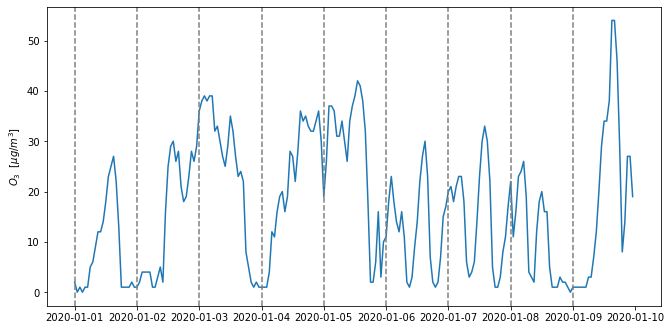

In [11]:
#Looking closer at january 2020

plt.figure(figsize=(16,8))
plt.figure(figsize=(11,5.5))

january_y = series[0:9*24]
january_x = dates[0:9*24]

plt.plot_date(january_x, january_y, fmt='-')
plt.ylabel('$O_3$  $[\mu g/m^3]$')

xcoords = january_x[0:len(january_x):24]
for xc in xcoords:
    plt.axvline(x=xc, color='tab:gray', linestyle='--')


Text(0, 0.5, 'Residual')

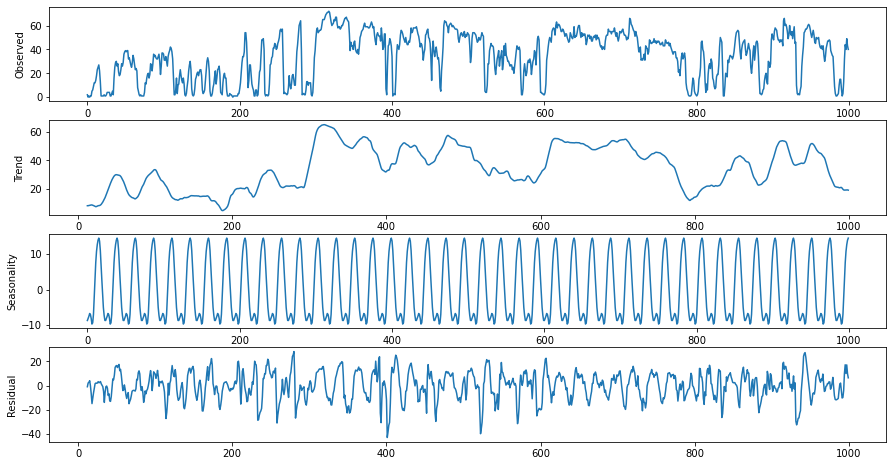

In [12]:
#Trends and seasonality
result = seasonal_decompose(series, model='additive', period = 24)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))

series[0:1000].plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend[0:1000].plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal[0:1000].plot(ax=ax3)
ax3.set_ylabel('Seasonality')
result.resid[0:1000].plot(ax=ax4)
ax4.set_ylabel('Residual')



In [13]:
#Dickey fuller test
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(series.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -9.600522751464494
ADF p-values: 1.9261286803676102e-16
ADF number of lags used: 26
ADF number of observations: 8757
ADF critical values: {'1%': -3.43109697018412, '5%': -2.8618701112277094, '10%': -2.5669457132319233}
ADF best information criterion: 58222.60202870662


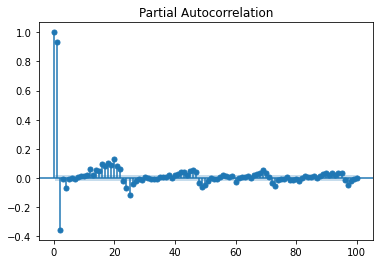

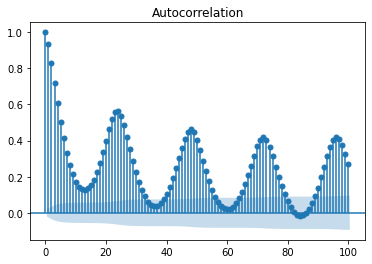

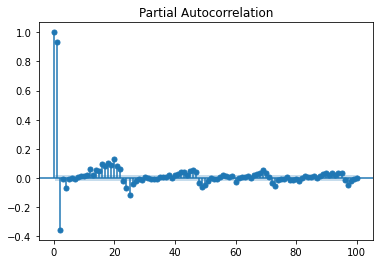

In [16]:
#ACF and PACF plots
plot_acf(series, lags = 100)
plot_pacf(series,lags = 100)

In [34]:
#Splitting data for evaluation
split = 0.9*len(series)#len(series) - 50
split = round(split)
train = series[0:split]
test = series[split::]

In [51]:
#Choosing parameters
my_order = (1,0,1)
my_seasonal_order = (1, 0, 1, 24)
# define model
model = SARIMAX(train, order=my_order, seasonal_order=my_seasonal_order)

In [52]:
#Fitting model
model_fit = model.fit()

In [47]:
#summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                        Antas-Espinho   No. Observations:                 7906
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 24)   Log Likelihood              -26251.779
Date:                              Sat, 30 Apr 2022   AIC                          52515.557
Time:                                      17:32:09   BIC                          52557.409
Sample:                                           0   HQIC                         52529.891
                                             - 7906                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8904      0.006    158.548      0.000       0.879       0.901
ma.L1          0.27

In [48]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test))
predictions = pd.Series(predictions, index=test.index)
residuals = test - predictions
#print(predictions)

Text(0, 0.5, 'Error')

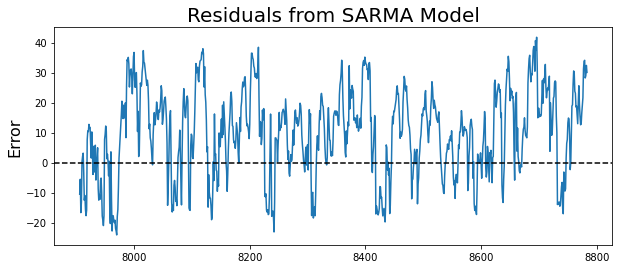

In [54]:
#Plotting residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

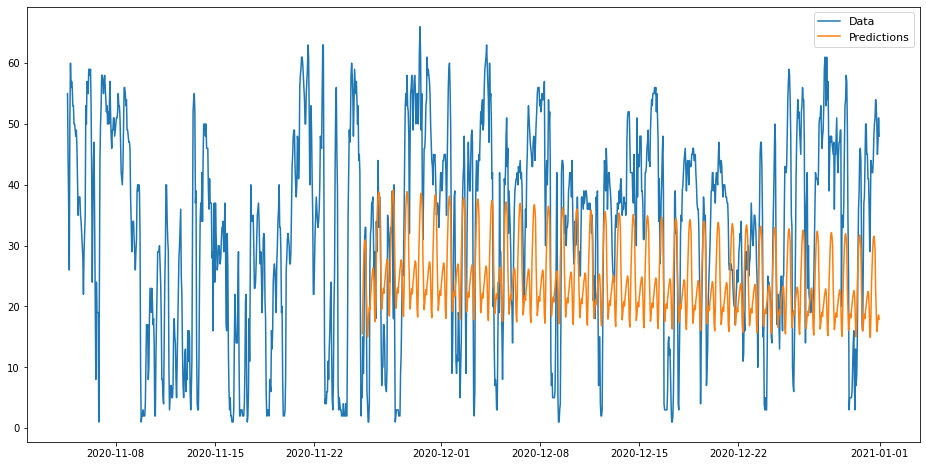

In [50]:
#Plotting
plt.figure(figsize=(16,8))

plt.plot(dates[split-500::],series[split-500::])
plt.plot(dates[split::],predictions)

plt.legend(('Data', 'Predictions'), fontsize=11)



https://neptune.ai/blog/select-model-for-time-series-prediction-task
You can detect non-stationarity using the Dickey-Fuller Test and you can remove non-stationarity using differencing.

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/